# Assessment Exercise 1

(a) Write a Python function to return the radial part of the hydrogenic wavefunction $R_{n,l}(r)$ given the quantum numbers $n$ and $l$ and an array of values for $r$. Assume $n < 4$ and use the following functional forms, where $\rho = (2Z/na_0)r$ and $a_0 = 4\pi\epsilon_0\hbar^2/m_e e^2$:

$$
\begin{align*}
R_\mathrm{1s} &= 2\left(\frac{Z}{a_0}\right)^{3/2} e^{-\rho/2}\\
R_\mathrm{2s} &= \frac{1}{\sqrt{8}}\left(\frac{Z}{a_0}\right)^{3/2} (2-\rho) e^{-\rho/2}\\
R_\mathrm{2p} &= \frac{1}{\sqrt{24}}\left(\frac{Z}{a_0}\right)^{3/2} \rho e^{-\rho/2}\\
R_\mathrm{3s} &= \frac{1}{\sqrt{243}}\left(\frac{Z}{a_0}\right)^{3/2} (6 - 6\rho + \rho^2) e^{-\rho/2}\\
R_\mathrm{3p} &= \frac{1}{\sqrt{486}}\left(\frac{Z}{a_0}\right)^{3/2} (4 - \rho) \rho e^{-\rho/2}\\
R_\mathrm{3d} &= \frac{1}{\sqrt{2430}}\left(\frac{Z}{a_0}\right)^{3/2} \rho^2 e^{-\rho/2}\\
\end{align*}
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Import some useful physical constants
from scipy.constants import epsilon_0, hbar, m_e, e
import checks

In [12]:
def R(r, n, L, Z):
    """Return the radial part of the hydrogenic wavefunction, R(r).
    
    n, L are the principal and azimuthal quantum numbers.
    Z is the nuclear charge (in units of e): i.e. +1 for H, +2, for He+, etc.
    r is the grid (NumPy array) of radial points (distance from the nucleus)
      to use, in Ångstroms.
    
    """

    # The Bohr radius (for an infinitely heavy nucleus)
    a0 = 4 * np.pi * epsilon_0 * hbar**2 / m_e / e**2
    # Scaled distance coordinate: NB we convert r from Å to m.
    rho = 2 * Z / n / a0 * (r / 1.e10)
    
    # Write your code here
    
    ans = 0
    factor1 = Z / a0
    factor2 = (-rho) / 2

    if n == 1:
        ans = 2 * factor1**(3/2) * e**(factor2)
    elif n == 2:
        if L == 0:
            ans = 8**(-1/2) * (factor1)**(3/2) * (2 - rho) * e**(factor2)
        else:
            ans = 24**(-1/2) * (factor1)**(3/2) * rho * e**(factor2)
    else:
        if L == 0:
            ans = 243**(-1/2) * (factor1)**(3/2) * (6 - 6 * rho * rho**2) * e**(factor2)
        elif L == 1:
            ans = 486**(-1/2) * (factor1)**(3/2) * (4 - rho) * rho* e**(factor2)
        else:
            ans = 2430**(-1/2) * (factor1)**(3/2) * rho**2 * e**(factor2)

    print(ans)
    return ans

In [13]:
r =np.linspace(0,25,1000)
R(r,1,0,1)

[  5.19551133e+015   4.02222054e+016   3.11389140e+017   2.41068822e+018
   1.86628785e+019   1.44482821e+020   1.11854586e+021   8.65947132e+021
   6.70392213e+022   5.18999027e+023   4.01794629e+024   3.11058240e+025
   2.40812648e+026   1.86430462e+027   1.44329285e+028   1.11735723e+029
   8.65026924e+029   6.69679814e+030   5.18447508e+031   4.01367658e+032
   3.10727691e+033   2.40556746e+034   1.86232350e+035   1.44175912e+036
   1.11616986e+037   8.64107695e+037   6.68968172e+038   5.17896575e+039
   4.00941141e+040   3.10397493e+041   2.40301116e+042   1.86034448e+043
   1.44022702e+044   1.11498375e+045   8.63189443e+045   6.68257287e+046
   5.17346227e+047   4.00515077e+048   3.10067646e+049   2.40045758e+050
   1.85836757e+051   1.43869655e+052   1.11379890e+053   8.62272166e+053
   6.67547157e+054   5.16796464e+055   4.00089466e+056   3.09738150e+057
   2.39790671e+058   1.85639276e+059   1.43716770e+060   1.11261531e+061
   8.61355864e+061   6.66837781e+062   5.16247285e+

/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in power
/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply


array([  5.19551133e+015,   4.02222054e+016,   3.11389140e+017,
         2.41068822e+018,   1.86628785e+019,   1.44482821e+020,
         1.11854586e+021,   8.65947132e+021,   6.70392213e+022,
         5.18999027e+023,   4.01794629e+024,   3.11058240e+025,
         2.40812648e+026,   1.86430462e+027,   1.44329285e+028,
         1.11735723e+029,   8.65026924e+029,   6.69679814e+030,
         5.18447508e+031,   4.01367658e+032,   3.10727691e+033,
         2.40556746e+034,   1.86232350e+035,   1.44175912e+036,
         1.11616986e+037,   8.64107695e+037,   6.68968172e+038,
         5.17896575e+039,   4.00941141e+040,   3.10397493e+041,
         2.40301116e+042,   1.86034448e+043,   1.44022702e+044,
         1.11498375e+045,   8.63189443e+045,   6.68257287e+046,
         5.17346227e+047,   4.00515077e+048,   3.10067646e+049,
         2.40045758e+050,   1.85836757e+051,   1.43869655e+052,
         1.11379890e+053,   8.62272166e+053,   6.67547157e+054,
         5.16796464e+055,   4.00089466e+

(b) Write a pair of functions which plot $R_{n,l}(r)$ and the radial distribution function $r^2|R_{n,l}(r)|^2$ on a provided Axes object (ie use `ax.plot()`).

In [20]:
def plot_psi(ax, r, n, L, Z, label):
    """Plot the radial part of the hydrogenic wavefunction on Axes ax.
    
    ax is the Axes object to plot on
    n, L are the principal and azimuthal quantum numbers
    Z is the nuclear charge
    r is a grid of distance points, in Ångstroms
    label is the label for this plot, to appear in the plot legend.
    
    """

    # Write your code here
    pass

    y = R(r, n, L, Z)
    ax.plot(r, y)

In [21]:
def plot_psi2(ax, r, n, L, Z, label):
    """Plot the rdf for the hydrogenic wavefunction on Axes ax.
    
    """

    # Write your code here
    pass
    temp = R(r,n,L,Z)
    temp2 = abs(temp)
    y = r**2 * temp2**2
    print(y)
    ax.plot(r, y)

Use your functions to generate plots comparing the wavefunctions $R_\mathrm{1s}(r)$, $R_\mathrm{2s}(r)$, $R_\mathrm{3s}(r)$ for H by running the cell below.

[  5.19551133e+015   8.49081379e+015   1.38761932e+016   2.26773006e+016
   3.70605940e+016   6.05666281e+016   9.89815878e+016   1.61761601e+017
   2.64360434e+017   4.32033552e+017   7.06054940e+017   1.15387700e+018
   1.88573445e+018   3.08177946e+018   5.03642737e+018   8.23082931e+018
   1.34513111e+019   2.19829330e+019   3.59258172e+019   5.87121082e+019
   9.59508210e+019   1.56808541e+020   2.56265850e+020   4.18804901e+020
   6.84435890e+020   1.11854586e+021   1.82799421e+021   2.98741691e+021
   4.88221448e+021   7.97880543e+021   1.30394386e+022   2.13098265e+022
   3.48257866e+022   5.69143728e+022   9.30128548e+022   1.52007142e+023
   2.48419117e+023   4.05981304e+023   6.63478805e+023   1.08429654e+024
   1.77202194e+024   2.89594370e+024   4.73272351e+024   7.73449839e+024
   1.26401775e+025   2.06573303e+025   3.37594384e+025   5.51716831e+025
   9.01648477e+025   1.47352759e+026   2.40812648e+026   3.93550359e+026
   6.43163416e+026   1.05109593e+027   1.71776351e+

/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


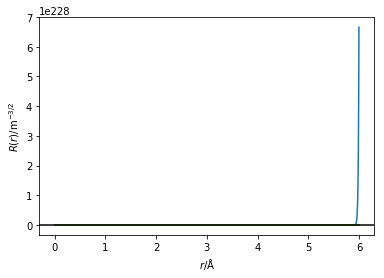

In [22]:
# a grid of distances 0 -> 6 Å
rmax = 6
r = np.linspace(0, rmax, 1000)
fig, ax = plt.subplots()

plot_psi(ax, r, 1, 0, 1, '1s')
plot_psi(ax, r, 2, 0, 1, '2s')
plot_psi(ax, r, 3, 0, 1, '3s')

plt.axhline(c='k')
plt.xlabel(r'$r /\mathrm{\AA}$')
plt.ylabel(r'$R(r) /\mathrm{m^{-3/2}}$')
plt.legend()

plt.show()

Now compare the radial distribution functions:

/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in power
/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply
/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[  5.19551133e+015   1.17804893e+016   2.67115053e+016   6.05666281e+016
   1.37330952e+017   3.11389140e+017   7.06054940e+017   1.60093437e+018
   3.63001619e+018   8.23082931e+018   1.86628785e+019   4.23168822e+019
   9.59508210e+019   2.17562344e+020   4.93308685e+020   1.11854586e+021
   2.53623113e+021   5.75074170e+021   1.30394386e+022   2.95660923e+022
   6.70392213e+022   1.52007142e+023   3.44666463e+023   7.81509138e+023
   1.77202194e+024   4.01794629e+024   9.11043597e+024   2.06573303e+025
   4.68391739e+025   1.06204828e+026   2.40812648e+026   5.46027262e+026
   1.23808186e+027   2.80727135e+027   6.36530805e+027   1.44329285e+028
   3.27257413e+028   7.42035231e+028   1.68251738e+029   3.81500044e+029
   8.65026924e+029   1.96139317e+030   4.44733344e+030   1.00840438e+031
   2.28649238e+031   5.18447508e+031   1.17554653e+032   2.66547650e+032
   6.04379731e+032   1.37039235e+033   3.10727691e+033   7.04555145e+033
   1.59753368e+034   3.62230535e+034   8.21334547e+

/Users/Caitlin/anaconda/anaconda/lib/python3.6/site-packages/matplotlib/ticker.py:1747: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


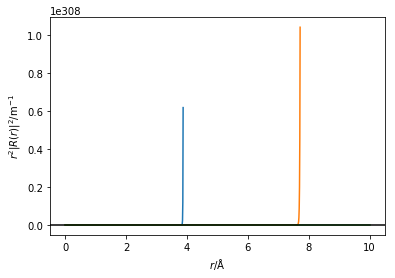

In [17]:
# a grid of distances 0 -> 10 Å
rmax = 10
r = np.linspace(0, rmax, 1000)
fig, ax = plt.subplots()

plot_psi2(ax, r, 1, 0, 1, '1s')
plot_psi2(ax, r, 2, 0, 1, '2s')
plot_psi2(ax, r, 3, 0, 1, '3s')

plt.axhline(c='k')
plt.xlabel(r'$r /\mathrm{\AA}$')
plt.ylabel(r'$r^2|R(r)|^2 /\mathrm{m^{-1}}$')
plt.legend()

plt.show()

Compare the radial distribution functions for the 1s orbitals of $\mathrm{H}$, $\mathrm{He^+}$ and $\mathrm{Li^{2+}}$:

In [ ]:
# a grid of distances 0 -> 6 Å
rmax = 2
r = np.linspace(0, rmax, 1000)
fig, ax = plt.subplots()

plot_psi2(ax, r, 1, 0, 1, r'$\mathrm{H^+}$')
plot_psi2(ax, r, 1, 0, 2, r'$\mathrm{He^{+}}$')
plot_psi2(ax, r, 1, 0, 3, r'$\mathrm{Li^{2+}}$')

plt.axhline(c='k')
plt.xlabel(r'$r /\mathrm{\AA}$')
plt.ylabel(r'$r^2|R(r)|^2 /\mathrm{m^{-1}}$')
plt.legend()

plt.show()

(c) Write a function, `get_rmax` which returns $r_\star$, the position of the maximum in the 1s orbital radial distribution function, and test it for $\mathrm{H}$, $\mathrm{He^+}$ and $\mathrm{Li^{2+}}$ (ie the most probable distance to find the electron from the nucleus).

Verify that $r_\star = a_0/Z$.

_Hint:_ [np.argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) would be helpful here...

In [ ]:
def get_rmax(n, L, Z):
    """Return the position in the r-grid of the rdf maximum."""
        
    # a grid of distances 0 -> 6 Å
    rmax = 6
    r = np.linspace(0, rmax, 10000)
    
    # Write your code here

## Check your code
Run the cell below to check your code.

In [ ]:
checks.run_check('check_rmax', get_rmax, hint=True)

---

# The supplementary exercise below is optional!

(d) [Harder, optional] Write a function to calculate, by numerical integration using `scipy.quad` or otherwise, the mean distance of the electron from the nucleus in an orbital for a provided value of $n$, $l$ and nuclear charge, $Z$. Compare your answer with the analytical result,
$$
\langle r \rangle = \int_0^\infty r^3 |R(r)|^2\;\mathrm{d}r = n^2\left[ 1 + \frac{1}{2}\left(1- \frac{l(l+1)}{n^2}\right)\right]\frac{a_0}{Z}.
$$
Your function should return $\langle r \rangle$ _in Ångstroms_.

In [ ]:
from scipy.integrate import quad

def get_rmean(n, L, Z):
    """Estimate the mean distance of the electron from the nucleus.
    
    n, L are the principal and azimuthal quantum numbers respectively.
    Z is the nuclear charge.
    
    """
    
    # Write your code here
    pass

In [ ]:
def get_rmean_analytical(n, L, Z):
    """Caclulate <r> for the atomic orbital.
    
    n, L are the principal and azimuthal quantum numbers respectively.
    Z is the nuclear charge.
    
    """
    
    # Write your code here
    pass

## Check your code
Run the cell below to check your code.

In [ ]:
checks.run_check('check_rmean', get_rmean, hint=True)